In [1]:
import ROOT
import uproot
import matplotlib.pyplot as plt

import numpy as np
from scipy.optimize import curve_fit
import awkward as ak

Welcome to JupyROOT 6.30/04


In [23]:
Vt = -1.25 #V


In [267]:
RunCs = uproot.open('../Dati/Run_ch2_Cs_Measurements_Only_3_21_2024.root')
RunCsBis = uproot.open('../Dati/Run_ch2_Cs_Measurements_Only_3_21_2024_BIS.root')

chargeCs = np.array(RunCs['tree'].arrays()['charge'])
chargeCsBis = np.array(RunCsBis['tree'].arrays()['charge'])

ampCs = np.array(RunCs['tree'].arrays()['amp'])
ampCsBis = np.array(RunCsBis['tree'].arrays()['amp'])

chargeCs = np.append(chargeCs,chargeCsBis)
ampCs = np.append(ampCs,ampCsBis)

RunNoise = uproot.open('../Dati/Run_ch2_X_Measurements_Only_3_21_2024.root')
RunNoiseBis = uproot.open('../Dati/Run_ch2_X_Measurements_Only_3_21_2024_BIS.root')

chargeN = np.array(RunNoise['tree'].arrays()['charge'])
chargeNBis = np.array(RunNoiseBis['tree'].arrays()['charge'])

ampN = np.array(RunNoise['tree'].arrays()['amp'])
ampNBis = np.array(RunNoiseBis['tree'].arrays()['amp'])

chargeN = np.append(chargeN,chargeNBis)
ampN = np.append(ampN,ampNBis)

evCs = np.array(RunCs['tree'].arrays()['ev'])[-1]
evCsBis = np.array(RunCsBis['tree'].arrays()['ev'])[-1]
evCsT = evCs+evCsBis

evN = np.array(RunNoise['tree'].arrays()['ev'])[-1]
evNBis = np.array(RunNoiseBis['tree'].arrays()['ev'])[-1]
evNT = evN+evNBis
print(evNT)
print(evCsT)

TCs = 428 #s
TN = 642 #s

rateCs = evCsT/TCs
rateN = evNT/TN

print(rateCs)
print(rateN)
print(TCs*rateN)


150000
200000
467.2897196261682
233.6448598130841
100000.0


In [245]:
trueCs = ampCs>Vt
chargeCs = chargeCs[trueCs]

trueX = ampN>Vt
chargeN = chargeN[trueX]
#chargeN=np.append(chargeN, chargeN)
print(len(chargeN))


149688


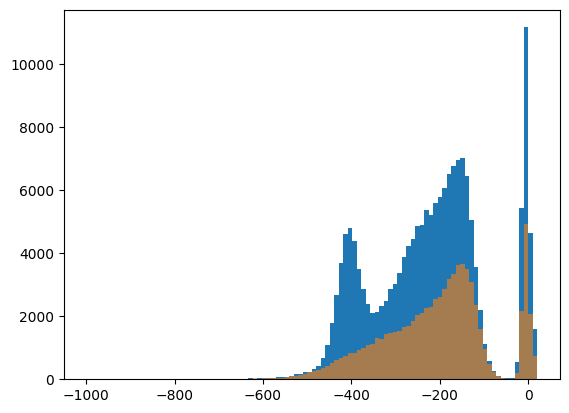

In [276]:
bin = 100


bin1,edge1,_ = plt.hist(chargeCs, bins=bin, range=(-1000,20))
bin2,edge2,_= plt.hist(chargeN[:100000], bins=bin, range=(-1000,20), alpha=0.6)
#ùplt.savefig('hist1_40.pdf')

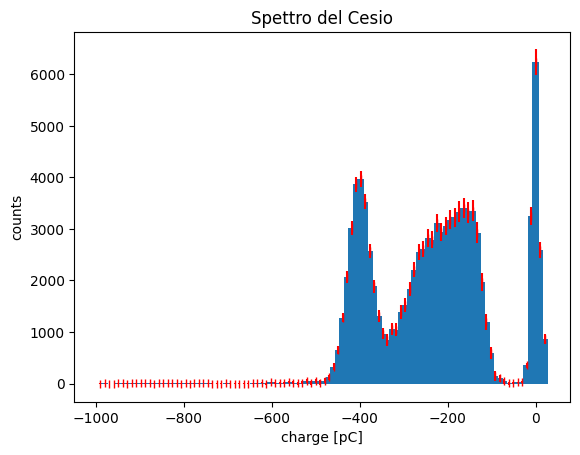

In [278]:
plt.bar(edge2[1:],binTot,width=15)
""""
cov=(np.mean(bin1*bin2)-np.mean(bin1)*np.mean(bin2))
print(cov)
corr=cov/(np.std(bin1)*np.std(bin2))
print(corr)
"""
err=np.sqrt(bin1+bin2)
plt.errorbar(edge2[1:], binTot, err*2, color='red', fmt='|')
plt.title("Spettro del Cesio")
plt.ylabel("counts")
plt.xlabel("charge [pC]")
plt.savefig("SpettroSchifo.pdf")